# Coding practice \#2: Due end of class, October 8

Answer the questions below in a jupyter notebook. You can simply add cells to this notebook and enter your answers. When you are finished, print the notebook and hand it in during class. \[To print: From the file menu, choose 'print preview' which will open a new tab with the notebook ready to print. Please print on both sides of paper if possible.\]

A reminder: Ruhl's office hours are T/R 2:30PM-3:30PM in Soc Sci 7444 and McWeeny's office hours are Monday 9:30AM-11:30AM in Soc Sci 6470.  

*You should feel free to discuss the coding practice with your classmates, but the work you turn in should be your own.*


# Exercise 0: Your name
Replace 'Your name' above with your actual name. Enter it as last name, first name.

# Exercise 1: Importing data

The file "banks_and_branches.csv" contains data on the number of commercial banking institutions, branches, and offices in the United States at the end of each year between 1934 to 2017. (This data is maintained by the Federal Deposit Insurance Corporation (FDIC) and can be downloaded from https://www5.fdic.gov/hsob/SelectRpt.asp?EntryTyp=10&Header=1, series CB01. The FDIC has a lot of interesting banking data. You are encouraged to browse around their website to see what's there -- this might be a useful source for your final project.)

Your task is to import this data into Python.

### Part (a):
In the code cell below, import the data from "banks_and_branches.csv" into a Pandas data frame called `banking_data`. If you open the .csv file in Excel or a similar program, you'll notice that there are notes in several of the cells at the beginning of the file. Rather than delete these manually, you should use the `header` option in `pandas.read_csv` to use the correct row for the column names.

In [1]:
import pandas as pd

banking_data = pd.read_csv("banks_and_branches.csv",header = 6)

### Part (b):
1. Convert each of the column names to lower case using a list comprehension.
2. We don't need the 'branches' column -- you might notice that the variable 'offices' is equal to 'institutions' plus 'branches'. Delete the 'branches' column.  
3. Rename the 'institutions' column 'banks'.
4. Then, print the data types of each column.

In [2]:
# Convert column names to lower case:
banking_data.columns = [col_name.lower() for col_name in banking_data.columns]

# Delete the 'branches' column. Two ways to do this:
# Method 1:
#del banking_data['branches']
# Method 2:
banking_data.drop('branches', axis=1, inplace =True)

# Rename 'institutions' to 'banks'
banking_data.rename(columns={'institutions': 'banks'}, inplace=True)

# Print the data type of each column: 
print(banking_data.dtypes)

year        int64
banks      object
offices    object
dtype: object


### Part (c):

You'll notice that some of the columns are listed as objects and not integers. Convert these columns to integers. Note that you'll need to remove the thousands separator (",") from each number first. Print the data types of each column to confirm that they are all integers.

Later, we will need a variable containing the average number of offices per institution in each year. Add a new column called 'offices_per_bank' to `banking_data` with this information.

In [3]:
# Convert strings to integers. Note that we need to remove the comma
# We could also do this by using some additional options in pd.read_csv()
banking_data['banks'] = banking_data['banks'].str.replace(",","").astype(int)
banking_data['offices'] = banking_data['offices'].str.replace(",","").astype(int)

# Print the data type of each column. These should all be integers now.
print(banking_data.dtypes)

# Create column with the number of offices per bank in each year.
banking_data['offices_per_bank'] = banking_data['offices']/banking_data['banks']

year       int64
banks      int32
offices    int32
dtype: object


# Exercise 2: Making subplots

Note: This exercise uses the `banking_data` data frame created in Exercise 1.

The U.S. banking industry has become increasingly concentrated over the years, especially due to a wave of mergers and acquisitions that occurred in the 1990s and 2000s. Furthermore, many commercial banks have begun to close their physical branch locations in recent years due to the rise of online and mobile banking. (See https://www.forbes.com/sites/laurengensler/2016/07/18/bank-branch-closures-more-to-come/#a1c22cd5e04f.)

In this exercise, you will create three time series plots of the number of banks, number of offices, and number of offices per bank between 1934 and 2017. 


### Part (a):
Carefully follow the instructions below:

1. Create a figure with three subplots (all in a single column). Set the figure size to (15,15).
2. In the first subplot, create a line plot of the number of banks by year. Make the line dotted and black. Label the x-axis "Year" and the y-axis "Number of banks". Set the title of this subplot as "Number of U.S. commercial banks, 1934-2017".
3. In the second subplot, create a line plot of the number of offices by year. Make the line dashed and red. Label the x-axis "Year" and the y-axis "Number of offices". Set the title of this subplot as "Number of offices of U.S. commercial banks, 1934-2017".
4. In the third subplot, create a line plot of the average number of offices per bank. Make the line blue with a dash-dot pattern. Label the x-axis "Year" and the y-axis "Number of offices per bank." Set the title of this subplot as "Average number of offices per bank, 1934-2017".


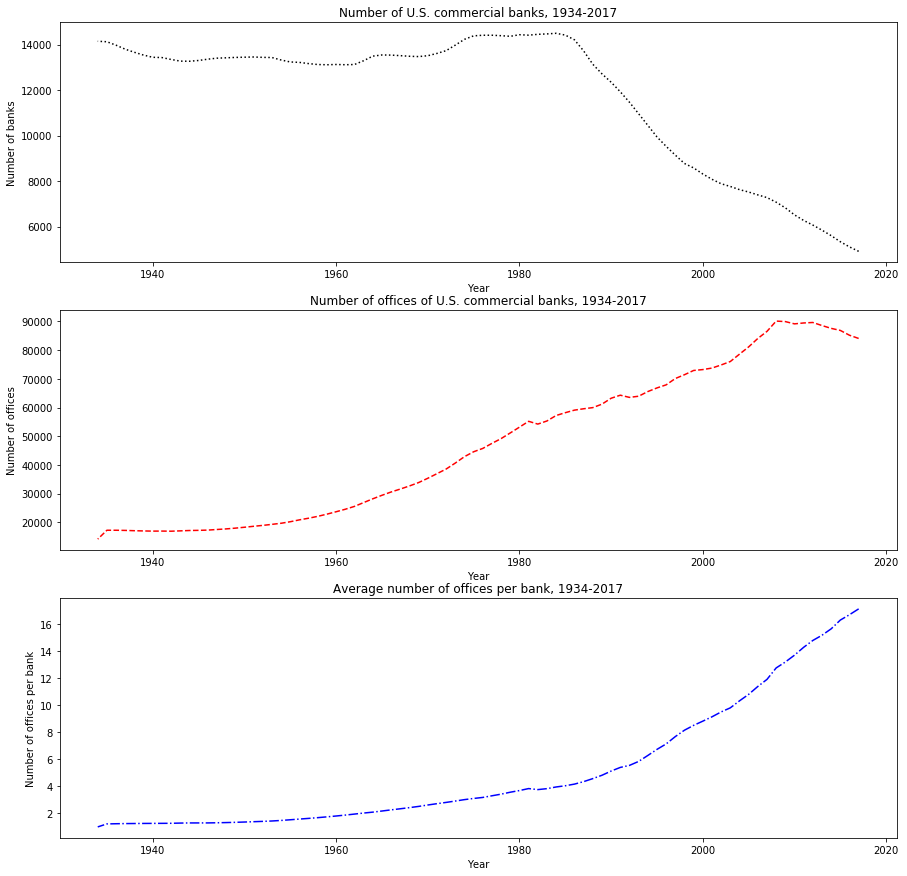

In [10]:
import matplotlib.pyplot as plt

# Create figure axes objects
fig1, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (15,15))

# Plot the first series and set label and line options:
ax1.plot(banking_data['year'],banking_data['banks'],'k:')
ax1.set(xlabel="Year", ylabel="Number of banks", title="Number of U.S. commercial banks, 1934-2017")

# Plot the second series and set label and line options:
ax2.plot(banking_data['year'],banking_data['offices'],'r--')
ax2.set(xlabel="Year", ylabel="Number of offices", title="Number of offices of U.S. commercial banks, 1934-2017")

# Plot the third series and set label and line options:
ax3.plot(banking_data['year'],banking_data['offices_per_bank'],'b-.')
ax3.set(xlabel="Year", ylabel="Number of offices per bank", title="Average number of offices per bank, 1934-2017")

plt.show()

### Part (b):

Why might plotting these three lines in the same subplot be problematic or confusing? Create a new markdown cell below to write your answer.

The main problem is that each of these series have vastly different magnitudes. The number of banks ranges from about 5,000 to 15,000, the number of offices ranges from around 15,000 to 90,000, and the number of offices per bank ranges from around 1 to 17. It would be very difficult to see the trends in these time series if they were plotted together. For example, the number of offices per bank would look flat.

### Part (c):

Create a new figure that plots the three time series above on the same plot. Set the figure size to (15,5). Maintain the same line color and pattern for each series as above, and add a legend with labels for each line.

Does this plot confirm your answer in part (b)?

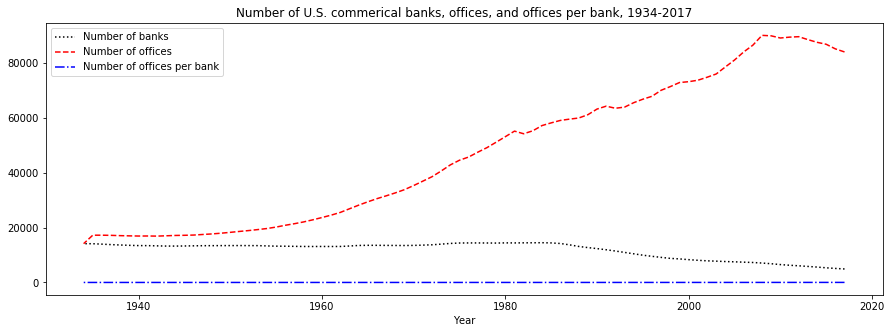

In [5]:
new_fig, new_ax = plt.subplots(figsize = (15,5))

new_ax.plot(banking_data['year'],banking_data['banks'],'k:',label = "Number of banks")
new_ax.plot(banking_data['year'],banking_data['offices'],'r--',label = "Number of offices")
new_ax.plot(banking_data['year'],banking_data['offices_per_bank'],'b-.',label = "Number of offices per bank")
new_ax.set(title = "Number of U.S. commerical banks, offices, and offices per bank, 1934-2017", xlabel = "Year")
new_ax.legend()

plt.show()

# Excercise 3
More work with U.S. GDP. The data come from FRED. The goal it to brush up on our data cleaning skills and dig into some of the setting of a plot that we can tweak to improve the look of a plot. 

### Part (a):
The file GDPA.csv contains annual nominal GDP. Read it into a DataFrame and create a series of growth rates.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('GDPA.csv', index_col=0, na_values='.')
data.rename(columns={'GDPA':'gdp'}, inplace=True)
data['gdp_growth'] = data['gdp'].pct_change()*100
data.head()

,gdp,gdp_growth
DATE,,
1929,104.556,NaN
1930,92.160,-11.855848
1931,77.391,-16.025391
1932,59.522,-23.089248
1933,57.154,-3.978361


Something went wrong, right? There is a gremlin in the data. Find a way to use read_csv() to turn the bad data into NaNs. Now compute the growth rates. Print the first 5 rows.

### Part (b) 
Plot the growth rates against the date. Make the figure size 10 by 10. Add a horizontal line at y=0. **Label the axis and add a title.**

Use the `annotate()` method of the axes to add the text 'World War II' to the figure at (1952, 28). Use the `arrowprops` argument of `annotate()` to add an arrow pointing to (1942,28). Check out the annotate [documentation](https://matplotlib.org/users/annotations.html) for details. 

I like to set the `facecolor` of the arrow to 'black' and I like the `arrowstyle` '->'. You can use whatever type of arrow you like.    

In the same manner, add the following labels to your figure. You decide where the arrow points and where the text goes. Make it look good! 
1. 'Great Recession' to year 2009
2. 'Great Depression' to 1932

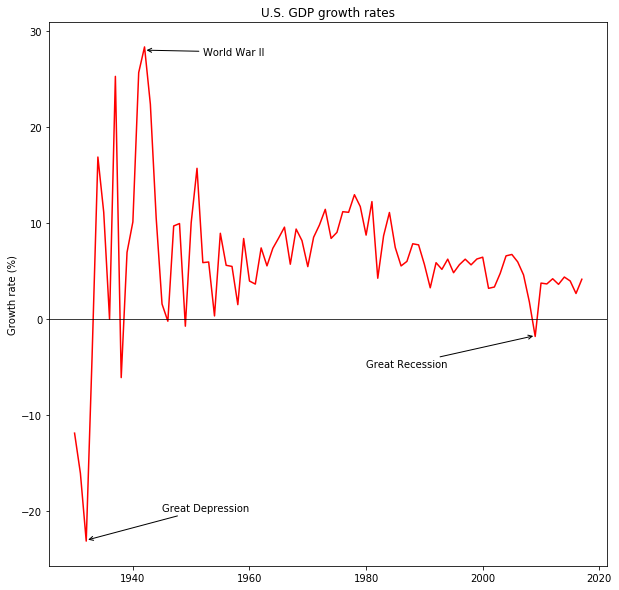

In [7]:
my_props = {'facecolor':'black',  'arrowstyle':'->'}

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(data.index, data['gdp_growth'], color='red')
ax.set_ylabel('Growth rate (%)')
ax.set_title('U.S. GDP growth rates')
ax.axhline(y=0, color='black', linewidth=0.75)


ax.annotate('World War II', xy=(1942, 28), xytext=(1952,27.5), arrowprops=my_props)
ax.annotate('Great Depression', xy=(1932, -23), xytext=(1945, -20), arrowprops=my_props)
ax.annotate('Great Recession', xy=(2009, -1.7), xytext=(1980, -5), arrowprops=my_props)

plt.show()

### Part (c):

Recreate the plot from part (b), but omit the annotations. 

1. Zoom in on the recent period. Set the x limits to (1990, 2020).
2. You will need to adjust the y limits also. Try (-2, 8).

Maybe we are making a figure to go in a presentation. We want to make it easy to read, especially if the projector is bright and it washes out the figure.
3. Change the line width to 3 
4. Set the font size of the y-axis label to 14
5. Set the font size of the title label to 20
6. Remove the top and right 'spines' of the axes
7. Set the font size of the tick labels to 14. (Check out the plt.xticks() documentation...)

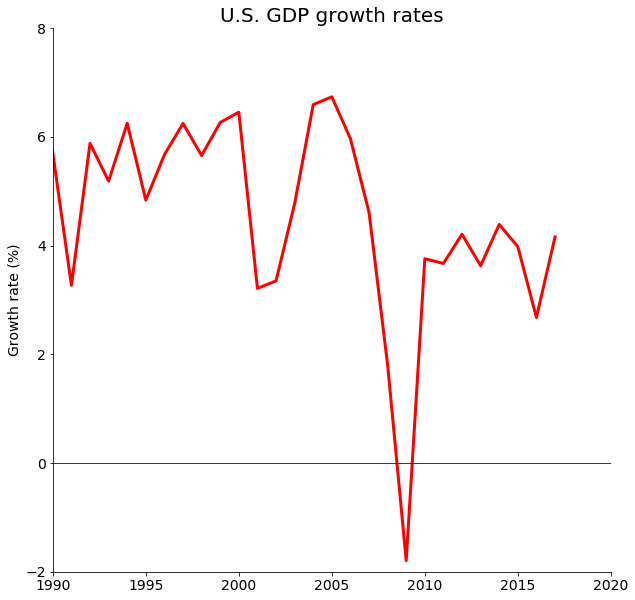

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(data.index, data['gdp_growth'], color='red', linewidth=3)

ax.set_ylabel('Growth rate (%)', fontsize=14)
ax.set_title('U.S. GDP growth rates', fontsize=20)

ax.axhline(y=0, color='black', linewidth=0.75)
ax.set_xlim(1990,2020)
ax.set_ylim(-2, 8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks(fontsize=14) 
plt.xticks(fontsize=14) 

plt.show()